# **Import Libraries and modules**

In [0]:
# https://keras.io/
%tensorflow_version 1.x
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


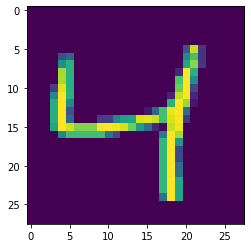

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5,5, activation='relu',  input_shape=(28,28,1)))
model.add(Convolution2D(64, 5,5,activation='relu'))
model.add(Convolution2D(128, 5,5,activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 8 ,activation=None))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation="relu")`
  import sys


In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 10)          1290      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 10)          6410      
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10 , verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.1324 - acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0496 - acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0377 - acc: 0.9884
Epoch 4/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0305 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0237 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 25s 421us/step - loss: 0.0197 - acc: 0.9936
Epoch 7/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0169 - acc: 0.9946
Epoch 8/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.0150 - acc: 0.9954
Epoch 9/10
60000/60000 [==============================] - 25s 420us/step - loss: 0.0130 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 25s 422us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.032316492706577174, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.94492825e-13 2.66347465e-11 7.26690796e-09 2.90801925e-08
  2.46973979e-17 2.59116209e-15 8.75068019e-24 1.00000000e+00
  1.06429656e-13 2.96823810e-08]
 [1.98709884e-08 1.42644869e-12 1.00000000e+00 6.37594758e-20
  1.25191893e-16 3.93316399e-18 2.38436604e-10 4.01654388e-17
  2.32770123e-11 6.33601415e-20]
 [9.68685021e-10 9.99999523e-01 2.68890091e-07 1.50418652e-15
  1.41202364e-07 7.32331903e-11 4.42349019e-10 6.34956336e-08
  9.56036761e-09 4.20645532e-11]
 [9.99999881e-01 6.31548427e-18 4.63211587e-12 5.04511035e-15
  5.69519807e-16 8.07979009e-13 6.33610071e-08 8.43995826e-13
  1.62921152e-11 4.01747524e-11]
 [1.42555231e-18 3.01177757e-13 6.17485121e-14 8.19394413e-19
  1.00000000e+00 1.84328412e-16 1.74765970e-14 3.08070908e-12
  4.27781617e-13 3.11028460e-11]
 [3.42863782e-09 9.99986172e-01 2.40159181e-07 1.40598448e-15
  2.27790508e-07 6.94223021e-12 1.08071989e-10 1.33692956e-05
  2.68178795e-08 3.56200958e-10]
 [9.46498286e-22 1.25650888e-06 4.18459863e-13 9.62788021e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

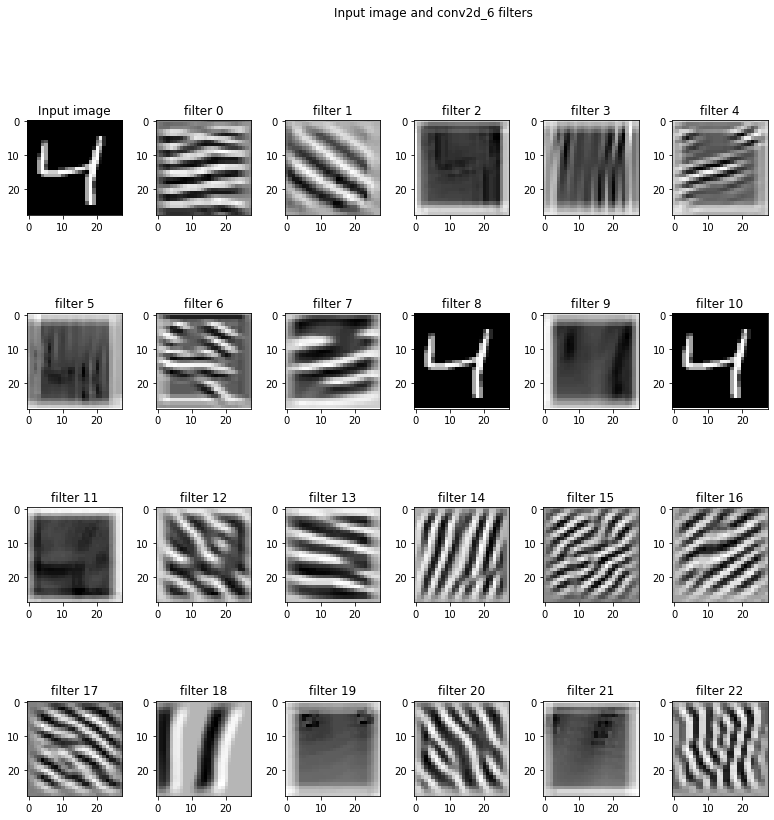

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()